In [1]:
import pandas as pd
data=pd.read_csv("C:/Users/MYCOM/data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.info()
# NULL 값 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## BMI

In [3]:
data['bmi'].max()

53.13

In [4]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

C:\Users\MYCOM\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(array([  3.,  21.,  40.,  72., 109., 139., 174., 164., 154., 146., 112.,
         78.,  58.,  34.,  14.,  11.,   5.,   2.]),
 array([15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47,
        49, 51]),
 <BarContainer object of 18 artists>)

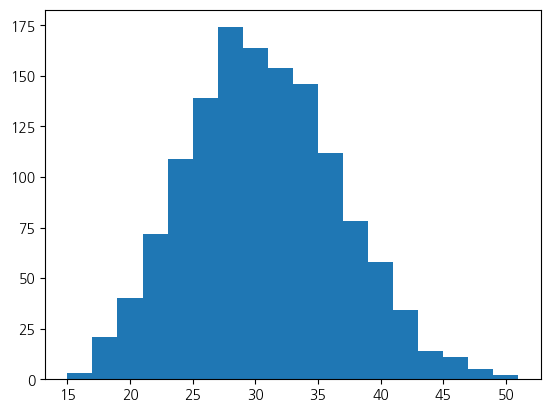

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(data['bmi'],bins=range(15,53,2))
# 정규분포에 가까움
# outlier 제외시키기

((array([-3.27870689, -3.01957648, -2.8753529 , ...,  2.8753529 ,
          3.01957648,  3.27870689]),
  array([18, 18, 18, ..., 64, 64, 64], dtype=int64)),
 (13.690519290862845, 39.20391271632807, 0.9728209027421862))

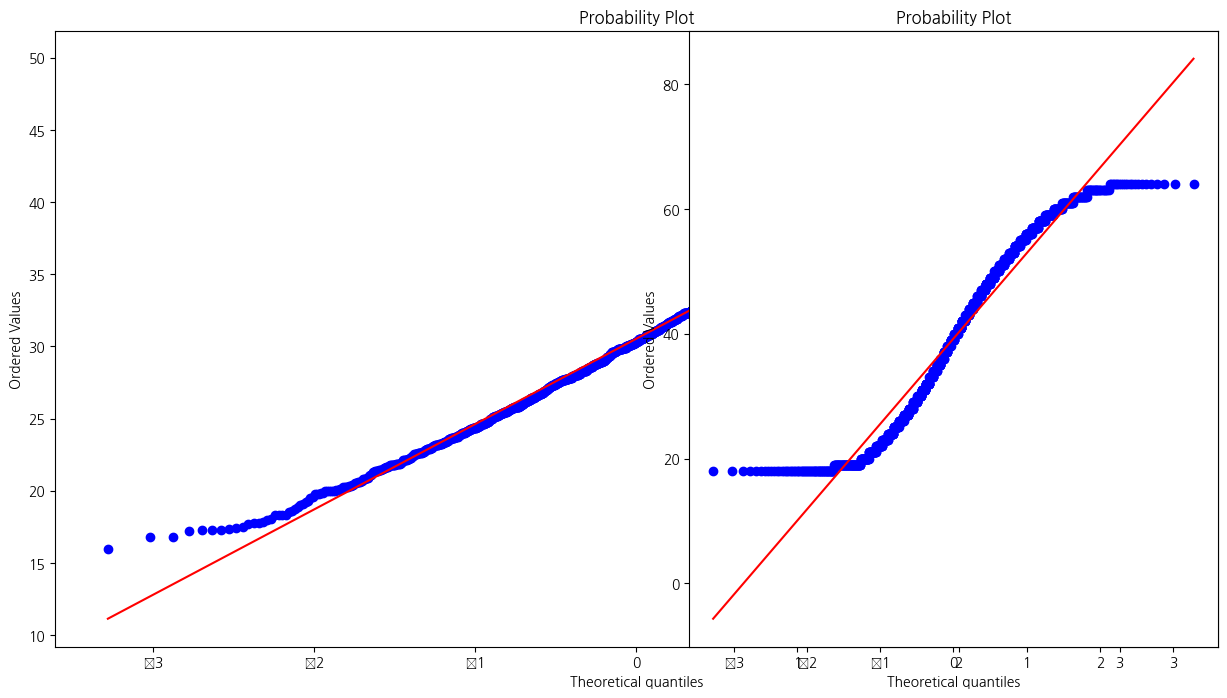

In [35]:
import scipy.stats as stats
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(1,1,1)
ax2=fig.add_subplot(1,2,2)
stats.probplot(data['bmi'],plot=ax1)
stats.probplot(data['age'],plot=ax2)
# 정규분포 확인 QQ plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1f97b0f9ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f97af0c0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f97b0f97f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f97af0c670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f97af0c940>],
 'means': []}

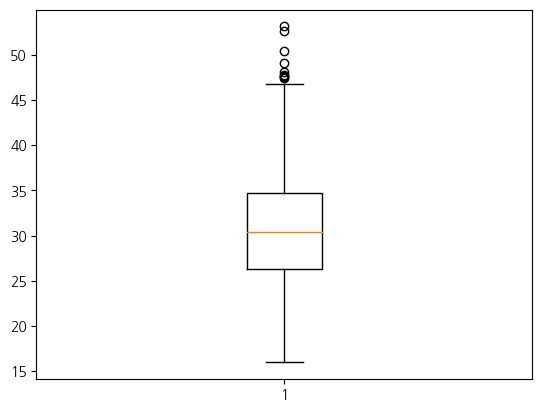

In [6]:
plt.boxplot(data['bmi'])

In [7]:
# 이상치 제거하기
IQR=data.bmi.quantile(0.75)-data.bmi.quantile(0.25)
data[data['bmi']>data.bmi.quantile(0.75)+1.5*IQR]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [8]:
data=data[data['bmi']<=data.bmi.quantile(0.75)+1.5*IQR]

In [9]:
# 확인하기
data[data['bmi']>data.bmi.quantile(0.75)+1.5*IQR]

,age,sex,bmi,children,smoker,region,charges


In [10]:
data['bmi'].describe()

count    1329.000000
mean       30.537348
std         5.919946
min        15.960000
25%        26.220000
50%        30.300000
75%        34.485000
max        46.750000
Name: bmi, dtype: float64

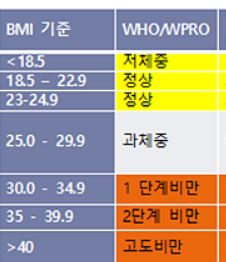

In [11]:
# BMI 기준으로 새로운 column 만들기

In [12]:
data[(data['bmi']>=25)&(data['bmi']<29.9)].count()

age         374
sex         374
bmi         374
children    374
smoker      374
region      374
charges     374
dtype: int64

In [13]:
# WHO 기준에 맞게 BMI 추가하기
if 'bmi std' not in data.columns:
    data['bmi std'] = 0

In [14]:
data.loc[data['bmi']<18.5,'bmi std']=1.0
data.loc[(data['bmi']>=18.5)&(data['bmi']<24.9),'bmi std']=2.0
data.loc[(data['bmi']>=25)&(data['bmi']<29.9),'bmi std']=3.0
data.loc[(data['bmi']>=30)&(data['bmi']<34.9),'bmi std']=4.0
data.loc[(data['bmi']>=35)&(data['bmi']<39.9),'bmi std']=5.0
data.loc[data['bmi']>40,'bmi std']=6.0

In [15]:
# 확인하기 -> int로 값이 삽입됨
data.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi std
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,4
2,28,male,33.000,3,no,southeast,4449.46200,4
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,3


C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='charges'>

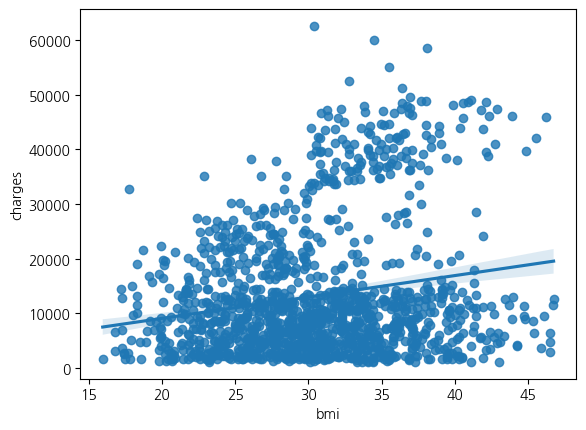

In [24]:
sns.regplot(data['bmi'],data['charges'])
# 어느 정도 양의 상관관계

## Age

In [17]:
data['age'].describe()

count    1329.000000
mean       39.203913
std        14.047835
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

(array([136.,  57.,  54.,  56.,  56.,  55.,  54.,  52.,  51.,  49.,  50.,
         54.,  54.,  56.,  56.,  57.,  58.,  56.,  53.,  52.,  49.,  69.]),
 array([18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50,
        52, 54, 56, 58, 60, 62]),
 <BarContainer object of 22 artists>)

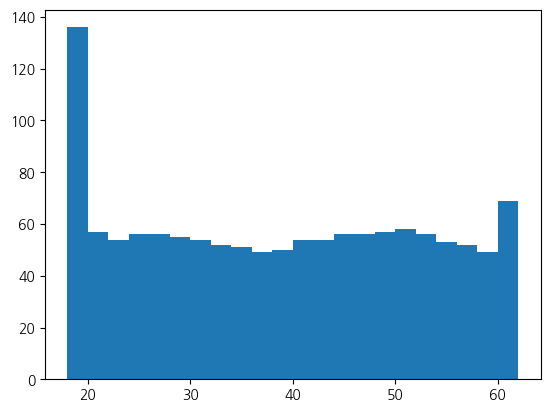

In [18]:
plt.hist(data['age'],bins=range(18,64,2))

In [19]:
# 데이터 왜도가 큰 것처럼 보임
data.age.skew()
# 하지만 실제로 skew값이 -2와 2사이에 있기 때문에 크지 않다고 봐도 무방
# 나이대별로 묶는건 어떤지?

0.058413301736796895

<AxesSubplot:xlabel='age', ylabel='charges'>

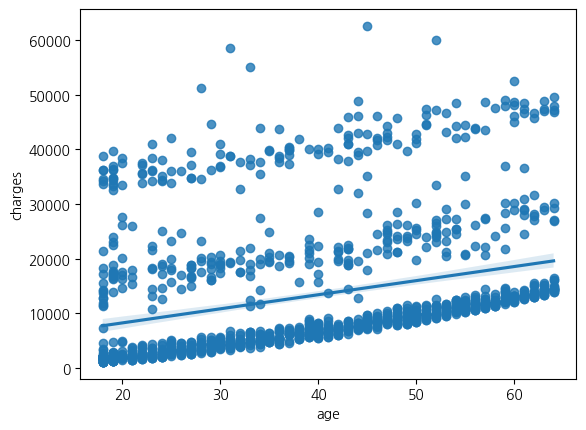

In [25]:
sns.regplot(data['age'],data['charges'])
# 어느 정도 양의 상관관계

## Smoker, Sex, Region, Children

Text(0.5, 1.0, 'Children')

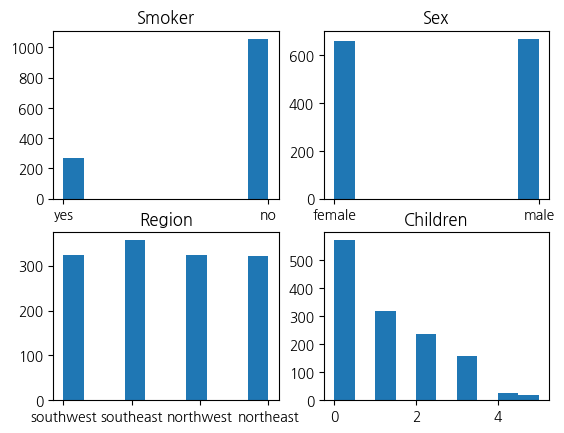

In [20]:
fig,ax=plt.subplots(2,2)

ax[0,0].hist(data['smoker'])
ax[0,0].set_title('Smoker')
ax[0,1].hist(data['sex'])
ax[0,1].set_title('Sex')
ax[1,0].hist(data['region'])
ax[1,0].set_title('Region')
ax[1,1].hist(data['children'])
ax[1,1].set_title('Children')

# Smoker, Sex, Region은 원핫인코딩

In [21]:
dummy=pd.get_dummies(data[['sex','smoker','region']])
data=pd.concat([data,dummy],axis=1)

In [22]:
data.drop(['sex','smoker','region'],axis=1,inplace=True)
data.head()

,age,bmi,children,charges,bmi std,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,4,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,4,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,2,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,3,0,1,1,0,0,1,0,0


In [65]:
data['charges'].describe()

count     1329.000000
mean     13212.333374
std      11997.236429
min       1121.873900
25%       4738.268200
50%       9361.326800
75%      16586.497710
max      62592.873090
Name: charges, dtype: float64

## 상관계수

In [38]:
data.corr()

,age,bmi,children,charges,bmi std,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.114686,0.043041,0.302022,0.096729,0.019143,-0.019143,0.024505,-0.024505,0.001766,-0.000283,-0.011581,0.010474
bmi,0.114686,1.000000,0.017355,0.193196,0.888484,-0.039958,0.039958,0.002871,-0.002871,-0.136193,-0.128598,0.255863,0.000651
children,0.043041,0.017355,1.000000,0.069739,-0.004540,-0.019281,0.019281,-0.007577,0.007577,-0.024857,0.024209,-0.018816,0.020021
charges,0.302022,0.193196,0.069739,1.000000,0.170398,-0.063394,0.063394,-0.785912,0.785912,0.009750,-0.037704,0.071597,-0.045906
bmi std,0.096729,0.888484,-0.004540,0.170398,1.000000,-0.050873,0.050873,0.011510,-0.011510,-0.118934,-0.102114,0.214924,-0.000839
sex_female,0.019143,-0.039958,-0.019281,-0.063394,-0.050873,1.000000,-1.000000,0.079854,-0.079854,-0.000573,0.009961,-0.010263,0.001195
sex_male,-0.019143,0.039958,0.019281,0.063394,0.050873,-1.000000,1.000000,-0.079854,0.079854,0.000573,-0.009961,0.010263,-0.001195
smoker_no,0.024505,0.002871,-0.007577,-0.785912,0.011510,0.079854,-0.079854,1.000000,-1.000000,-0.004947,0.035940,-0.068270,0.039440
smoker_yes,-0.024505,-0.002871,0.007577,0.785912,-0.011510,-0.079854,0.079854,-1.000000,1.000000,0.004947,-0.035940,0.068270,-0.039440
region_northeast,0.001766,-0.136193,-0.024857,0.009750,-0.118934,-0.000573,0.000573,-0.004947,0.004947,1.000000,-0.322387,-0.343402,-0.321730


C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\MYCOM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


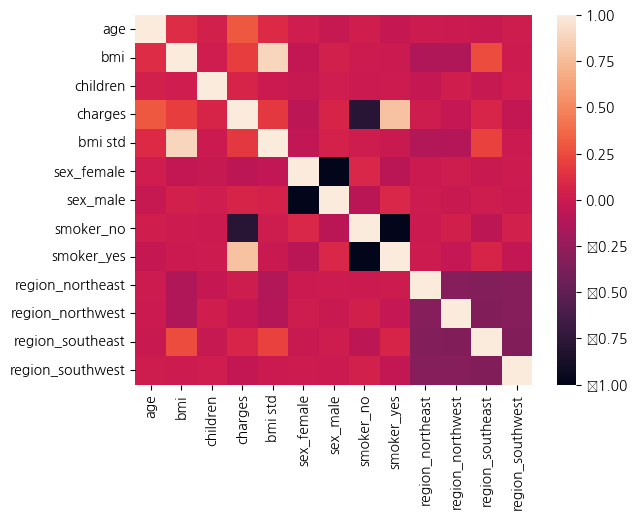

In [39]:
sns.heatmap(data.corr())
# smoker와 관계가 높음

## 표준화

In [46]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
data[['age','bmi','children','bmi std']]=sts.fit_transform(data[['age','bmi','children','bmi std']])
data.head(10)

,age,bmi,children,charges,bmi std,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.445670,-0.907940,16884.92400,-0.449319,1,0,0,1,0,0,0,1
1,-1.509976,0.546267,-0.079764,1725.55230,0.347937,0,1,1,0,0,0,1,0
2,-0.797855,0.416149,1.576587,4449.46200,0.347937,0,1,1,0,0,0,1,0
3,-0.441794,-1.323542,-0.907940,21984.47061,-1.246576,0,1,1,0,0,1,0,0
4,-0.513006,-0.280065,-0.907940,3866.85520,-0.449319,0,1,1,0,0,1,0,0
5,-0.584218,-0.810675,-0.907940,3756.62160,-0.449319,1,0,1,0,0,0,1,0
6,0.483964,0.490502,-0.079764,8240.58960,0.347937,1,0,1,0,0,0,1,0
7,-0.156945,-0.472707,1.576587,7281.50560,-0.449319,1,0,1,0,0,1,0,0
8,-0.156945,-0.119530,0.748411,6406.41070,-0.449319,0,1,1,0,1,0,0,0
9,1.480934,-0.793777,-0.907940,28923.13692,-0.449319,1,0,1,0,0,1,0,0
